In [43]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = .2)

In [45]:
# 단일 모델의 정확도 측정

In [46]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=8, max_features=32, random_state=35)
dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(C=0.1, gamma=0.003, probability=True, random_state=35)
svm.fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [47]:
print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dtree_predicted))
print("knn   : ",accuracy_score(y_test, knn_predicted))
print("svm   : ",accuracy_score(y_test, svm_predicted))

[accuarcy]
d-tree:  0.8361111111111111
knn   :  0.8972222222222223
svm   :  0.9388888888888889


In [48]:
# 아래 SVM으로부터 나온 테스트 데이터 2개의 0부터 9까지의 확률을 보실 수 있습니다.
svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[9.42162689e-04 1.09159939e-03 2.79534021e-03 4.13695842e-04
  9.86663854e-01 6.36687816e-04 8.76472018e-04 8.56995284e-04
  4.31646394e-03 1.40672911e-03]
 [2.05313737e-02 9.42644780e-03 9.43322576e-03 9.08150832e-03
  5.12916674e-03 3.31880881e-02 3.55604109e-03 6.90446338e-03
  4.10179926e-02 8.61731693e-01]]


In [49]:
# 하드 보팅
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('KNN', knn), ('SVM', svm)
],weights=[1, 1, 1], voting='hard')
voting_clf.fit(X_train, y_train)
hard_voting_pred = voting_clf.predict(X_test)
accuracy_score(y_test, hard_voting_pred)

0.9472222222222222

In [50]:
# 소프트 보팅
voting_clf = VotingClassifier(estimators=[
    ('decision_tree', dtree), ('KNN', knn), ('SVM', svm)
],weights=[1, 1, 1], voting='soft')
voting_clf.fit(X_train, y_train)
soft_voting_pred = voting_clf.predict(X_test)
accuracy_score(y_test, soft_voting_pred)

0.9

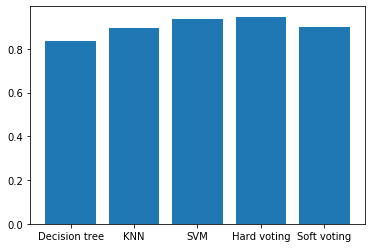

In [51]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(5)
plt.bar(x, height=[
    accuracy_score(y_test, dtree_predicted),
    accuracy_score(y_test, knn_predicted),
    accuracy_score(y_test, svm_predicted),
    accuracy_score(y_test, hard_voting_pred),
    accuracy_score(y_test, soft_voting_pred),
])
plt.xticks(x, ['Decision tree', 'KNN', 'SVM', 'Hard voting', 'Soft voting'])
plt.show()